# Lab 01 (Set Cover problem)

In [45]:
from random import random, seed
from itertools import product, accumulate
from matplotlib import pyplot as plt
import numpy as np

from icecream import ic
from tqdm import tqdm

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [46]:
UNIVERSE_SIZE = 10000
NUM_SETS = 1000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10000 * DENSITY)]))

In [47]:
# DON'T EDIT THESE LINES!
SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [48]:
def valid(solution):
    """Checks wether solution is valid (i.e. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()


def evaluate(solution):
    """
    Returns the fitness of a solution (to be maximized).
    If the solution is invalid a score of (all_sets + 1) is given.
    """
    if valid(solution):
        return -cost(solution)
    else:
        return -(cost(np.full(NUM_SETS, True)) + 1)

# Tweak functions

In [52]:
def tweak_prob(solution):
    # One or more tweaks
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.5:
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution


# (-118318.63900521302) @ 860536/1000000
def tweak_perc(solution, perc, max_perc=0.99):
    # More tweaks later in the climb
    if perc > max_perc:  # Clip it
        perc = max_perc
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < (perc ** 2):
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

# RMHC

In [53]:
MAX_STEPS = 1000000

solution = np.full(NUM_SETS, True)
history = [evaluate(solution)]
for n in tqdm(range(MAX_STEPS)):
    new_solution = tweak_perc(solution, n / MAX_STEPS)
    history.append(evaluate(new_solution))
    if evaluate(new_solution) > evaluate(solution):
        solution = new_solution

ic(evaluate(solution))
ic(history.index(evaluate(solution)))

  0%|          | 0/1000000 [00:00<?, ?it/s]

100%|██████████| 1000000/1000000 [04:14<00:00, 3932.08it/s]
ic| evaluate(solution): np.float64(-121908.34627101647)
ic| history.index(evaluate(solution)): 805911


805911

# Plot

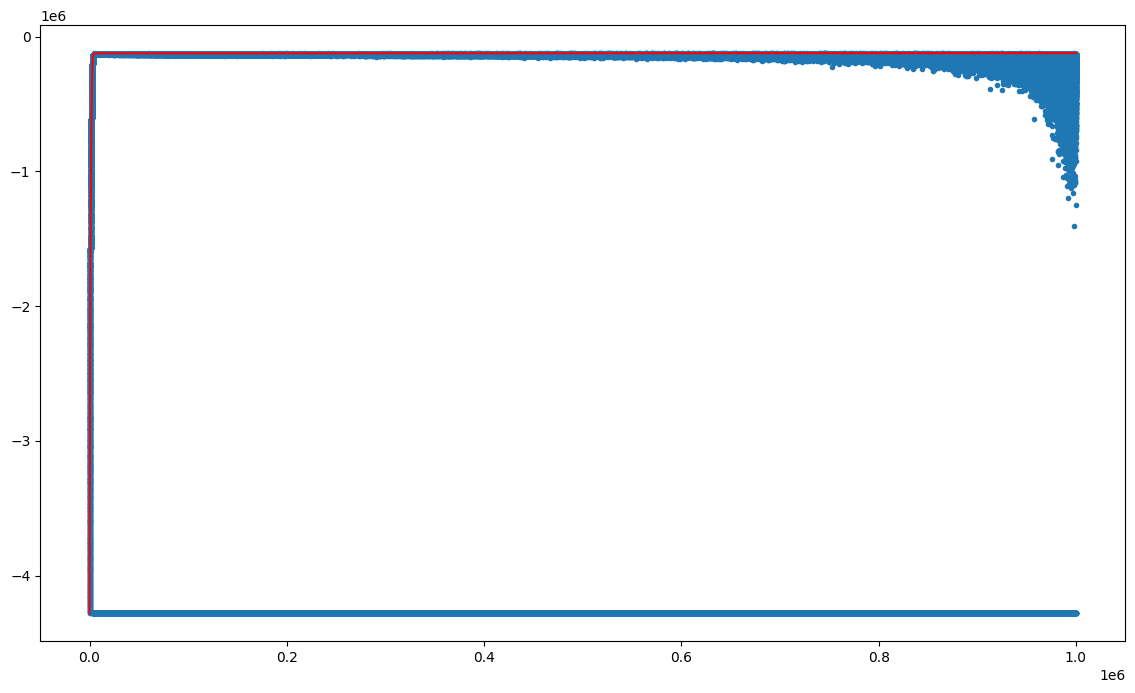

In [54]:
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
plt.scatter(range(len(history)), history, marker=".")
plt.show()